In [5]:
#搬送車の優先順位を決定するクラス
class Rank:
    def __init__(self, vehicle_sum):
        self.v_rank = []
        for count in range(vehicle_sum):
            self.v_rank.append(count)
            
obj = Rank(3)
print(obj.v_rank)

[0, 1, 2]


In [14]:
#優先順位入れ替えプログラム（point，next_pointが必要）
vehicle_sum = 6
v_rank = [4,3,2,1,0, 5]
next_point = 4
point = 1
if(point > next_point):
    tmp = v_rank[next_point]
    print('tmp', tmp)
    for count in range(next_point+1, vehicle_sum):
        tmp2 = v_rank[count]
        print('tmp2', tmp2)
        v_rank[count] = tmp
        print('v_rank',v_rank[count])
        tmp = tmp2
        print('tmp', tmp)
        if(count == point):
            break
    v_rank[next_point] = tmp
elif(point < next_point):
    tmp = v_rank[point]
    for count in range(point+1, next_point+1):
        v_rank[count-1] = v_rank[count]
    v_rank[next_point] = tmp
    
print(v_rank)

[4, 2, 1, 0, 3, 5]


In [22]:
#point,next_pointを決定する
vehicle_sum = 6
last_move = 2
last_ready = 4
before_state = 'ready_move'
state = 'move'
next_point = -1
point = 3
if((before_state == 'stop') and (state == 'move')):
    next_point = last_move+1
    last_move = last_move+1
    last_ready = last_ready+1
elif((before_state == 'move') and (state == 'move')):
    next_point = last_move
elif((before_state == 'move') and (state == 'ready_move')):
    next_point = last_ready
    last_move = last_move-1
    last_ready = last_ready
elif((before_state == 'ready_move') and (state == 'stop')):
    next_point = last_ready
    last_ready = last_ready-1
elif((before_state == 'ready_move') and (state == 'move')):
    next_point = last_move+1
    last_move = last_move+1
    last_ready = last_ready
print(next_point)
print(last_move)
print(last_ready)

3
3
4


In [32]:
class Rank:
    def __init__(self, vehicle_sum):
        self.vehicle_sum = vehicle_sum
        self.v_rank = []
        for count in range(vehicle_sum):
            self.v_rank.append(count)
        self.last_move = -1
        self.last_ready = -1
            
    def change_rank(self, before_state, state, point):
        next_point = -1
        if((before_state == 'stop') and (state == 'move')):
            self.last_move = self.last_move+1
            self.last_ready = self.last_ready+1
            next_point = self.last_move
        elif((before_state == 'move') and (state == 'move')):
            next_point = self.last_move
        elif((before_state == 'move') and (state == 'ready_move')):
            next_point = self.last_ready
            self.last_move = self.last_move-1
            self.last_ready = self.last_ready
        elif((before_state == 'ready_move') and (state == 'stop')):
            next_point = self.last_ready
            self.last_ready = self.last_ready-1
        elif((before_state == 'ready_move') and (state == 'move')):
            next_point = self.last_move+1
            self.last_move = self.last_move+1
            self.last_ready = self.last_ready
        
        if(point > next_point):
            tmp = self.v_rank[next_point]
            for count in range(next_point+1, self.vehicle_sum):
                tmp2 = self.v_rank[count]
                self.v_rank[count] = tmp
                tmp = tmp2
                if(count == point):
                    break
            self.v_rank[next_point] = tmp
        elif(point < next_point):
            tmp = self.v_rank[point]
            for count in range(point+1, next_point+1):
                self.v_rank[count-1] = self.v_rank[count]
            self.v_rank[next_point] = tmp
    

rank = Rank(5)
rank.change_rank('stop', 'move', 0)
print(rank.v_rank)
rank.change_rank('stop', 'move', 1)
print(rank.v_rank)
rank.change_rank('move', 'ready_move', 1)
print(rank.v_rank)
rank.change_rank('stop', 'move', 3)
print(rank.v_rank)
rank.change_rank('stop', 'move', 3)
print(rank.v_rank)
rank.change_rank('stop', 'move', 4)
print(rank.v_rank)
rank.change_rank('ready_move', 'move', 4)
print(rank.v_rank)
rank.change_rank('move', 'ready_move', 1)
print(rank.v_rank)
rank.change_rank('move', 'ready_move', 0)
print(rank.v_rank)
rank.change_rank('ready_move', 'move', 4)
print(rank.v_rank)##
rank.change_rank('move', 'ready_move', 0)
print(rank.v_rank)
rank.change_rank('move', 'ready_move', 1)
print(rank.v_rank)
rank.change_rank('move', 'ready_move', 0)
print(rank.v_rank)
rank.change_rank('move', 'ready_move', 0)
print(rank.v_rank)
rank.change_rank('ready_move', 'stop', 3)
print(rank.v_rank)
rank.change_rank('ready_move', 'stop', 1)
print(rank.v_rank)
rank.change_rank('ready_move', 'stop', 1)
print(rank.v_rank)
rank.change_rank('ready_move', 'stop', 1)
print(rank.v_rank)
rank.change_rank('ready_move', 'stop', 0)
print(rank.v_rank)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 3, 1, 2, 4]
[0, 3, 2, 1, 4]
[0, 3, 2, 4, 1]
[0, 3, 2, 4, 1]
[0, 2, 4, 1, 3]
[2, 4, 1, 3, 0]
[2, 4, 1, 0, 3]
[4, 1, 0, 3, 2]
[4, 0, 3, 2, 1]
[0, 3, 2, 1, 4]
[3, 2, 1, 4, 0]
[3, 2, 1, 0, 4]
[3, 1, 0, 2, 4]
[3, 0, 1, 2, 4]
[3, 0, 1, 2, 4]
[3, 0, 1, 2, 4]


In [11]:
%run -i vs_dijkstra.py

time 497
衝突しました
搬送車番号 0 2
衝突座標 16 22
24
走行時間の総和 4496
最終走行完了時間 1773


In [2]:
%run -i vs_regular.py

99
走行時間の総和 4213
最終走行完了時間 1515


In [10]:
route_list = [[float(0) for i in range(2)] for i in range(3)] 
print(route_list)

[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]


In [12]:
class Vehicle:
    speed = 1
    node_num = map_length*map_side
    route_list = [[float(0) for i in range(Vehicle.node_num)] for j in range(Vehicle.node_num)]
    unserched_nodes = list(range(Vehicle.node_num))
    distance = [math.inf] * Vehicle.node_num
    
    def __init__(self, x, y, ready_x, ready_y, goal, direction, state, vehicle_n, muki):
        self.x = x                 #位置
        self.y = y   
        self.ready_x = ready_x     #待機場所を保持
        self.ready_y = ready_y
        self.goal = goal           #移動予定場所
        self.direction = direction #移動方向
        self.state = state         #状態
        self.vehicle_n = vehicle_n #搬送車識別番号
        self.muki = muki           #搬送車が向いている向き
        self.vehicle_x = []                   #他の搬送車の座標を保持
        self.vehicle_y = []
        self.static_potential = []            #静的なポテンシャルを保持
        self.static2_potential = []           #静的なポテンシャルを保持
        self.dynamic_potential = []           #動的なポテンシャルを保持
        self.next_x = -1                      #次に移動するセルの座標
        self.next_y = -1
        self.goal_x = -1                      #搬送予定場所の座標
        self.goal_y = -1
        self.limit_x = -1                     #時限ポテンシャルを定義する座標
        self.limit_y = -1
        self.limit_x2 = -1
        self.limit_y2 = -1
        self.double_limit = 0                 #時限ポテンシャルを二つ定義しているか判定する
        self.carrier = -1                     #割り当てられた搬送物
        self.have_carrier = 0                 #搬送物を保持しているかどうか
        self.driving_time = 0                 #走行時間
        self.limit_count = 50                  #時限ポテンシャルのリミット
        self.limit_count2 = 10
        self.rank = self.vehicle_n #搬送車の優先順位
        self.previous_nodes = [-1] * Vehicle.node_num
            
        
    #他の搬送車の初期位置を取得する    
    def get_point(self):
        for count in range(vehicle_sum):
            self.vehicle_x.append(vehicle[count].x)
            self.vehicle_y.append(vehicle[count].y)
            
    #他の搬送車の現在地を取得する        
    def change_point(self):
        for count in range(vehicle_sum):
            self.vehicle_x[count] = vehicle[count].x
            self.vehicle_y[count] = vehicle[count].y            
            
    #ポテンシャル場の生成
    def make_potential(self):
        for i in range(map_length):
            for j in range(map_side):
                if(mapping[i*map_side+j].celltype == 'wall'):
                    self.static_potential.append(8)
                    self.static2_potential.append(8)
                    self.dynamic_potential.append(8)
                elif(mapping[i*map_side+j].celltype == 'no_entry'):
                    self.static_potential.append(8)
                    self.static2_potential.append(8)
                    self.dynamic_potential.append(8)
                elif(mapping[i*map_side+j].celltype == 'accept'):
                    self.static_potential.append(0)
                    self.static2_potential.append(0)
                    self.dynamic_potential.append(0)
                elif(mapping[i*map_side+j].celltype == 'road'):
                    self.static_potential.append(0)
                    self.static2_potential.append(0)    
                    self.dynamic_potential.append(0) 
                
    #静的なポテンシャル場の更新
    def change_s_potential(self):
        for i in range(map_length):
            for j in range(map_side):
                if(self.static_potential[i*map_side+j] != 8):
                    if((j == self.goal_x) and (i == self.goal_y)):
                        self.static2_potential[i*map_side+j] = -3
                        #print(j, i, 1)
                    else:
                        self.static2_potential[i*map_side+j] = self.static_potential[i*map_side+j] + potential(j, i, self.goal_x, self.goal_y, 1)
                        #print(j, i, potential(j, i, self.goal_x, self.goal_y, 1))
                  
                        
                        
    #動的なポテンシャル場の更新
    def change_d_potential(self):
        '''
        for i in range(map_length):
            for j in range(map_side):
                self.dynamic_potential[i*map_side+j] = self.static2_potential[i*map_side+j]
                for count in range(self.vehicle_n):
                    if((j == self.vehicle_x[count]) and (i == self.vehicle_y[count])):
                        self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] +1
                    else:                                
                        self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] + potential(j, i, self.vehicle_x[count], self.vehicle_y[count], 3)
                        
                if((self.limit_x != -1) and (self.limit_y != -1)):
                    #self.limit_count = self.limit_count -1
                    if((j == self.limit_x) and (i == self.limit_y)):
                        self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] +1
                    else:
                        self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] + potential(j, i, self.limit_x, self.limit_y, 2)
                    '''    
        '''
                    if(self.limit_count == 0):
                        self.limit_count = 50
                        self.limit_x = -1
                        self.limit_y = -1    
                       ''' 
        #ダイクストラ法で移動するか
        if(self.rank == 0):
            #ダイクストラ法で経路導出していない
            if(self.f_dijkstra == 0):
                self.dijkstra()
        else:
            #時限ポテンシャルがない場合
            if((self.limit_x == -1) and (self.limit_y == -1)):
                for i in range(map_length):
                    for j in range(map_side):
                        if(self.static_potential[i*map_side+j] != 8):
                            self.dynamic_potential[i*map_side+j] = self.static2_potential[i*map_side+j]
                            for k in range(self.rank):
                                count = rank.v_rank[k]
                                if(count != self.vehicle_n):
                                    if((j == self.vehicle_x[count]) and (i == self.vehicle_y[count])):
                                        self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] +1
                                    else:                                
                                        self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] + potential(j, i, self.vehicle_x[count], self.vehicle_y[count], 3)                
                               
                        
            #時限ポテンシャルがある場合                            
            else:
                #ダブル時限ポテンシャルがない場合
                if(self.double_limit == 0):
                    self.limit_count = self.limit_count -1
                    for i in range(map_length):
                        for j in range(map_side):
                            if(self.static_potential[i*map_side+j] != 8):
                                self.dynamic_potential[i*map_side+j] = self.static2_potential[i*map_side+j]
                                #rankが０の場合もfor文を回す為
                                if(self.rank != 0):
                                    for k in range(self.rank):
                                        count = rank.v_rank[k]
                                        if(count != self.vehicle_n):
                                            if((j == self.vehicle_x[count]) and (i == self.vehicle_y[count])):
                                                if((j == self.limit_x) and (i == self.limit_y)):
                                                    self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] +1 + 1
                                                else:
                                                    self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] +1 + potential(j, i, self.limit_x, self.limit_y, 2)
                                            else:
                                                if((j == self.limit_x) and (i == self.limit_y)):
                                                    self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] +1 + 1
                                                else:
                                                    self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] + potential(j, i, self.limit_x, self.limit_y, 2) + potential(j, i, self.vehicle_x[count], self.vehicle_y[count], 3) 
                                if(self.rank == 0):
                                    if((j == self.limit_x) and (i == self.limit_y)):
                                        self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] +1 
                                    else:
                                        self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] + potential(j, i, self.limit_x, self.limit_y, 2)
                    if(self.limit_count == 0):
                        self.limit_count = 50
                        self.limit_x = -1
                        self.limit_y = -1
                #ダブル時限ポテンシャルがある場合        
                elif(self.double_limit == 1):
                    self.limit_count = self.limit_count -1
                    self.limit_count2 = self.limit_count2 -1
                    for i in range(map_length):
                        for j in range(map_side):
                            if(self.static_potential[i*map_side+j] != 8):
                                self.dynamic_potential[i*map_side+j] = self.static2_potential[i*map_side+j]
                                if(self.rank != 0):
                                    for k in range(self.rank):
                                        count = rank.v_rank[k]
                                        if(count != self.vehicle_n):
                                            if((j == self.vehicle_x[count]) and (i == self.vehicle_y[count])):
                                                if((j == self.limit_x) and (i == self.limit_y)):
                                                    if((j == self.limit_x2) and (i == self.limit_y2)):
                                                        self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] +1 + 1 +3
                                                    else:
                                                        self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] +1 + 1
                                                else:
                                                    if((j == self.limit_x2) and (i == self.limit_y2)):
                                                        self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] +1 + potential(j, i, self.limit_x, self.limit_y, 2) + 3
                                                    else:
                                                        self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] +1 + potential(j, i, self.limit_x, self.limit_y, 2)
                                            else:
                                                if((j == self.limit_x) and (i == self.limit_y)):
                                                    if((j == self.limit_x2) and (i == self.limit_y2)):
                                                        self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] +1 + 1 +3
                                                    else:
                                                        self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] +1 + 1
                                                else:
                                                    if((j == self.limit_x2) and (i == self.limit_y2)):
                                                        self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] + potential(j, i, self.limit_x, self.limit_y, 2) + potential(j, i, self.vehicle_x[count], self.vehicle_y[count], 3) +3
                                                    else:
                                                        self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] + potential(j, i, self.limit_x, self.limit_y, 2) + potential(j, i, self.vehicle_x[count], self.vehicle_y[count], 3)
                                if(self.rank == 0):
                                    if((j == self.limit_x) and (i == self.limit_y)):
                                        if((j == self.limit_x2) and (i == self.limit_y2)):
                                            self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] + 1 +3
                                        else:
                                            self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] +1
                                    else:
                                        if((j == self.limit_x2) and (i == self.limit_y2)):
                                            self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] + potential(j, i, self.limit_x, self.limit_y, 2) + 3
                                        else:
                                            self.dynamic_potential[i*map_side+j] = self.dynamic_potential[i*map_side+j] + potential(j, i, self.limit_x, self.limit_y, 2)
                                
                    if(self.limit_count2 == 0):
                        self.limit_count = 10
                        self.limit_x2 = -1
                        self.limit_y2 = -1
                        self.double_limit = 0 
                    if(self.limit_count == 0):
                        self.limit_count = 50
                        self.limit_x = -1
                        self.limit_y = -1
    
    #ダイクストラ法による経路導出
    def dijkstra(self):
        #初期化
        Vehicle.route_list = [[float(0) for i in range(Vehicle.node_num)] for j in range(Vehicle.node_num)]
        Vehicle.unserched_nodes = list(range(Vehicle.node_num))
        Vehicle.distance = [math.inf] * Vehicle.node_num
        self.previous_nodes = [-1] * Vehicle.node_num
        
        #重みの生成
        for i in range(1, map_length-1):
            for j in range(1, map_side-1):
            tmp = i*map_side+j
            self.dynamic_potential[i*map_side+j] = self.static2_potential[i*map_side+j]
            if(self.dynamic_potential[tmp - map_side] != 8):
                Vehicle.route_list[tmp][tmp - map_side] = (self.dynamic_potential[tmp]+self.dynamic_potential[tmp-map_side])/2
            if(self.dynamic_potential[tmp + map_side] != 8):
                Vehicle.route_list[tmp][tmp + map_side] = (self.dynamic_potential[tmp]+self.dynamic_potential[tmp+map_side])/2
            if(self.dynamic_potential[tmp - 1] != 8):
                Vehicle.route_list[tmp][tmp - 1] = (self.dynamic_potential[tmp]+self.dynamic_potential[tmp- 1])/2
            if(self.dynamic_potential[tmp + 1] != 8):
                Vehicle.route_list[tmp][tmp + 1] = (self.dynamic_potential[tmp]+self.dynamic_potential[tmp+ 1])/2
        
        #本計算
        #スタート位置の設定
        distance[self.y*map_side+self.x] = 0
        #ゴールの設定
        goal = self.goal_y*map_side+self.goal_x
        #無限ループ防止
        kill = 0
        #ゴールのノードが探索済みになるまで繰り返す
        while(Vehicle.unsearched_nodes.count(goal) != 0):
            kill = kill+1
            #未探索ノードの内distanceが最小のものを選択する
            posible_min_distance = math.inf
            target_min_index = -1
            for node_index in Vehicle.unsearched_nodes:
                if(posible_min_distance > Vehicle.distance[node_index]):
                    posible_min_distance = Vehicle.distance[node_index]
                    target_min_index = node_index
            #選択したノードを未探索ノードから除く
            if(target_min_index != -1):
                Vehicle.unsearched_nodes.remove(target_min_index)
            #コストの更新
            target_edge = Vehicle.route_list[target_min_index]
            for index, route_dis in enumerate(target_edge):
                if(route_dis != 0):
                    if(Vehicle.distance[index] > (Vehicle.distance[target_min_index]+route_dis)):
                        Vehicle.distance[index] = Vehicle.distance[target_min_index]+route_dis
                        Vehicle.previous_nodes[index] = target_min_index
            if(kill == map_side*map_length + 100):
                print('ダイクストラプログラムの異常終了')
                break                

                    

In [13]:
import math

#for文　確認
static_potential = []
map_side = 5
map_length = 5
node_num = map_side*map_length
for i in range(map_length):
    for j in range(map_side):
        if((i == 0) or (i == 4) or (j == 0) or (j == 4)):
            static_potential.append(8)
        else:
            static_potential.append(i+map_side*j)
        
        
route_list = [[float(0) for i in range(node_num)] for j in range(node_num)]
unsearched_nodes = list(range(node_num))
distance = [math.inf] * node_num
previous_nodes = [-1] * node_num
    
for i in range(1, map_length-1):
    for j in range(1, map_side-1):
        tmp = i*map_side+j
        
        if(static_potential[tmp - map_side] != 8):
            route_list[tmp][tmp - map_side] = (static_potential[tmp]+static_potential[tmp-map_side])/2
        if(static_potential[tmp + map_side] != 8):
            route_list[tmp][tmp + map_side] = (static_potential[tmp]+static_potential[tmp+map_side])/2
        if(static_potential[tmp - 1] != 8):
            route_list[tmp][tmp - 1] = (static_potential[tmp]+static_potential[tmp- 1])/2
        if(static_potential[tmp + 1] != 8):
            route_list[tmp][tmp + 1] = (static_potential[tmp]+static_potential[tmp+ 1])/2
'''        
for count in range(node_num):        
    print(count, route_list[count])
'''    

#スタート位置
distance[18] = 0
goal = 6
kill = 0
#未探索ノードがなくなるまで繰り返す
while(unsearched_nodes.count(goal) != 0):
    kill = kill+1
    #未探索ノードの内distanceが最小のものを選択する
    posible_min_distance = math.inf
    target_min_index = -1
    for node_index in unsearched_nodes:
        if(posible_min_distance > distance[node_index]):
            posible_min_distance = distance[node_index]
            target_min_index = node_index
    print('target_min_index', target_min_index)
    if(target_min_index != -1):
        unsearched_nodes.remove(target_min_index)
        print('unsearched_nodes', unsearched_nodes)
    
    target_edge = route_list[target_min_index]
    for index, route_dis in enumerate(target_edge):
        if(route_dis != 0):
            if((index in unsearched_nodes) == True):
                if(distance[index] > (distance[target_min_index]+route_dis)):
                    distance[index] = distance[target_min_index]+route_dis
                    previous_nodes[index] = target_min_index
                    print('index', index, 'previous_node', target_min_index)
    if(kill == 100):
        break

kill = 0
print("-----経路-----")
previous_node = 6
while previous_node != -1:
    if previous_node !=0:
        print(str(previous_node) + " <- ", end='')
    else:
        print(str(previous_node))
    print(previous_node%map_side, int(previous_node/map_side))
    previous_node = previous_nodes[previous_node]
    print('previous_node', previous_node)
    kill = kill +1
    if(kill == 100):
        break

print("-----距離-----")
print(distance[6])

target_min_index 18
unsearched_nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24]
index 13 previous_node 18
index 17 previous_node 18
target_min_index 17
unsearched_nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24]
index 12 previous_node 17
target_min_index 13
unsearched_nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19, 20, 21, 22, 23, 24]
index 8 previous_node 13
target_min_index 12
unsearched_nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 19, 20, 21, 22, 23, 24]
index 7 previous_node 12
index 11 previous_node 12
target_min_index 8
unsearched_nodes [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 14, 15, 16, 19, 20, 21, 22, 23, 24]
target_min_index 11
unsearched_nodes [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 14, 15, 16, 19, 20, 21, 22, 23, 24]
index 6 previous_node 11
target_min_index 7
unsearched_nodes [0, 1, 2, 3, 4, 5, 6, 9, 10, 14, 15, 16, 19, 20, 21, 22, 23, 24]
target_min_index 6
unsearched_nodes

In [11]:
mylist = [1,2,3,4]
if((5 in mylist) == False):
    print(5)

5


In [16]:
node = []
obj = []  #ノード番号，アークでつながれているノード番号
node.append(obj)
node[0].append(1)
node.append([3])
node[1].append(2)
print(node)

[[1], [3, 2]]


In [17]:
node = []
obj = []  #ノード番号，アークでつながれているノード番号
node.append(obj)

print(node)

[[]]


In [5]:
class Example:
    def __init__(self, a):
        self.a = a
        
    def printf(self):
        x = obj.cal()
        print(x)
    def cal(self):
        print(self.a*3)
        return self.a*3
    
obj = Example(1)
obj.printf

<bound method Example.printf of <__main__.Example object at 0x05A54070>>

In [8]:
def printf():
    x = cal()
    print(x)
def cal():
    return 3
printf()

3


In [29]:
class Example:
    def __init__(self, a):
        self.a = a
        
    def printf(self):
        x = self.cal()
        print(x)
    def cal(self):
        print(self.a*3)
        return self.a*3
    
obj = Example(1)
obj.printf()

3
3


In [12]:
#ダイクストラ法sample
import math

route_list = [
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [3, 0, 0, 0, 0]]  # 初期のノード間の距離のリスト

node_num = len(route_list) #ノードの数

unsearched_nodes = list(range(node_num)) # 未探索ノード
distance = [math.inf] * node_num # ノードごとの距離のリスト
previous_nodes = [-1] * node_num # 最短経路でそのノードのひとつ前に到達するノードのリスト
distance[0] = 0 # 初期のノードの距離は0とする
goal = 18

# @GDaigo さんのコメントより関数の追加 2017/03/18
def get_target_min_index(min_index, distance, unsearched_nodes):
    start = 0
    while True:
        index = distance.index(min_index, start)
        found = index in unsearched_nodes
        if found:
            return index
        else:
            start = index + 1

while(unsearched_nodes.count(goal) == 0): #未探索ノードがなくなるまで繰り返す
    # まず未探索ノードのうちdistanceが最小のものを選択する
    posible_min_distance = math.inf # 最小のdistanceを見つけるための一時的なdistance。初期値は inf に設定。
    for node_index in unsearched_nodes: # 未探索のノードのループ
        if posible_min_distance > distance[node_index]: 
            posible_min_distance = distance[node_index] # より小さい値が見つかれば更新
    target_min_index = get_target_min_index(posible_min_distance, distance, unsearched_nodes) # 未探索ノードのうちで最小のindex番号を取得
    unsearched_nodes.remove(target_min_index) # ここで探索するので未探索リストから除去

    target_edge = route_list[target_min_index] # ターゲットになるノードからのびるエッジのリスト
    for index, route_dis in enumerate(target_edge):
        if route_dis != 0:
            if distance[index] > (distance[ target_min_index] + route_dis):
                distance[index] = distance[ target_min_index] + route_dis # 過去に設定されたdistanceよりも小さい場合はdistanceを更新
                previous_nodes[index] =  target_min_index #　ひとつ前に到達するノードのリストも更新

# 以下で結果の表示

print("-----経路-----")
previous_node = node_num - 1
while previous_node != -1:
    if previous_node !=0:
        print(str(previous_node + 1) + " <- ", end='')
    else:
        print(str(previous_node + 1))
    previous_node = previous_nodes[previous_node]

print("-----距離-----")
print(distance[node_num - 1])

ValueError: inf is not in list

In [5]:
def dijkstra(s,n,w,cost):
    #始点sから各頂点への最短距離
    #n:頂点数,　w:辺の数, cost[u][v] : 辺uvのコスト(存在しないときはinf)
    d = [float("inf")] * n
    used = [False] * n
    d[s] = 0
    
    while True:
        v = -1
        #まだ使われてない頂点の中から最小の距離のものを探す
        for i in range(n):
            if (not used[i]) and (v == -1):
                v = i
            elif (not used[i]) and d[i] < d[v]:
                v = i
        if v == -1:
                break
        used[v] = True
               
        for j in range(n):
               d[j] = min(d[j],d[v]+cost[v][j])
    return d

################################
n,w = map(int,input().split()) #n:頂点数　w:辺の数

cost = [[float("inf") for i in range(n)] for i in range(n)] 
#cost[u][v] : 辺uvのコスト(存在しないときはinf この場合は10**10)
for i in range(w):
    x,y,z = map(int,input().split())
    cost[x][y] = z
    cost[y][x] = z
print(dijkstra(0,n,w,cost))

7 10
0 1 2
0 2 5
1 2 4
2 3 2
1 3 6
1 4 10
3 5 1
4 5 3
4 6 5
5 6 9
[0, 2, 5, 7, 11, 8, 16]


In [7]:
unsearched_nodes = list(range(node_num)) # 未探索ノード
print(unsearched_nodes)
for node_index in unsearched_nodes:
    print(node_index)

[0, 1, 2, 3, 4]
0
1
2
3
4


In [17]:
#クラス変数　確認
class Sample:
    a = 1
    def example(self):
        print(self.a)
        print(Sample.a)
        
obj1 = Sample()
obj2 = Sample()
obj2.a = 2
obj1.example()
obj2.example()

1
1
2
1


In [32]:
#変数初期化　確認
class Vehicle:
    speed = 1
    node_num = 2*2
    route_list = [[float(0) for i in range(Vehicle.node_num)] for j in range(Vehicle.node_num)]
    unserched_nodes = list(range(Vehicle.node_num))
    distance = [math.inf] * Vehicle.node_num
    def __init__(self):
        self.previous_nodes = [-1] * Vehicle.node_num
        
        
    def printf(self):
        print(Vehicle.node_num)
        print(Vehicle.route_list)
        print(Vehicle.unserched_nodes)
        print(Vehicle.distance)
        print(self.previous_nodes)
        
vehicle = Vehicle()
vehicle.printf()
Vehicle.route_list[2][1] = 1.1
Vehicle.unserched_nodes.remove(2)
Vehicle.distance[2] = 22
vehicle.previous_nodes[2] = 11
vehicle.printf()
Vehicle.route_list = [[float(0) for i in range(Vehicle.node_num)] for j in range(Vehicle.node_num)]
Vehicle.unserched_nodes = list(range(Vehicle.node_num))
Vehicle.distance = [math.inf] * Vehicle.node_num
vehicle.previous_nodes = [-1] * Vehicle.node_num
vehicle.printf()

4
[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]
[0, 1, 2, 3]
[inf, inf, inf, inf]
[-1, -1, -1, -1]
4
[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 1.1, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]
[0, 1, 3]
[inf, inf, 22, inf]
[-1, -1, 11, -1]
4
[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]
[0, 1, 2, 3]
[inf, inf, inf, inf]
[-1, -1, -1, -1]


In [6]:
list1 = [1,2]
list2 = [1,2]
print(distance.index(list1[0], list2[1]))

ValueError: 1 is not in list

In [17]:
list1 = [1,2]
list2 = [1,2]
print(list1.index(list2, 1))
print(list1)

ValueError: [1, 2] is not in list

In [13]:
l = list('abcde')
print(l)
# ['a', 'b', 'c', 'd', 'e']

print(l.index('a'))
# 0

print(l.index('c'))
# 2

['a', 'b', 'c', 'd', 'e']
0
2


In [1]:
%run -i make_carrier.py

carrier_sum 100


In [5]:
%run -i vs_dijkstra.py

time 1733
衝突しました
搬送車番号 1 2
衝突座標 16 22
time 3481
衝突しました
搬送車番号 1 2
衝突座標 15 22
36
走行時間の総和 10155
最終走行完了時間 3575


In [6]:
%run -i vs_regular.py

94
走行時間の総和 10988
最終走行完了時間 3785


In [27]:
from queue import LifoQueue
 
q = LifoQueue()

for count in range(10):
    q.put(count)
    
for count in range(10):
    print(q.get())

9
8
7
6
5
4
3
2
1
0


In [28]:
from queue import LifoQueue
 
q = LifoQueue()
 
abc = ['a','b','c','d','e']
for i in abc:
    q.put(i)
    print("Enqueue:"+i)
 
print("--------")
 
while True:
    if q.empty():
        break
    else:
        i = q.get()
        print("Dequeue:"+i)

Enqueue:a
Enqueue:b
Enqueue:c
Enqueue:d
Enqueue:e
--------
Dequeue:e
Dequeue:d
Dequeue:c
Dequeue:b
Dequeue:a


In [10]:
class A:
    map_length = 10
    sample = map_length
    sample2 = sample*sample
    def b(self):
        print(A.sample)
        
map_length = 10
obj = A()
obj.b()

10


In [4]:
class Hoge:
    x = 5
    def fuga(self):
        x = 10
        print(x)
obj = Hoge()
obj.fuga

<bound method Hoge.fuga of <__main__.Hoge object at 0x05C8ACB0>>

In [7]:
vehicle_sum = 3
for count in range(vehicle_sum, vehicle_sum+vehicle_sum):
    print(count)

3
4
5


In [1]:
#%run -i make_carrier.py
%run -i vs_record_potential.py

carrier_sum 100
time 754
衝突しました
搬送車番号 0 1
衝突座標 16 2
time 2499
衝突しました
搬送車番号 0 1
衝突座標 16 21
time 2500
衝突しました
搬送車番号 0 1
衝突座標 16 22
time 3140
衝突しました
搬送車番号 0 1
衝突座標 14 2
搬送車が移動中に終了しました
搬送車が移動中に終了しました
搬送車が移動中に終了しました
42
走行時間の総和 9410
最終走行完了時間 3167


<IPython.core.display.Javascript object>


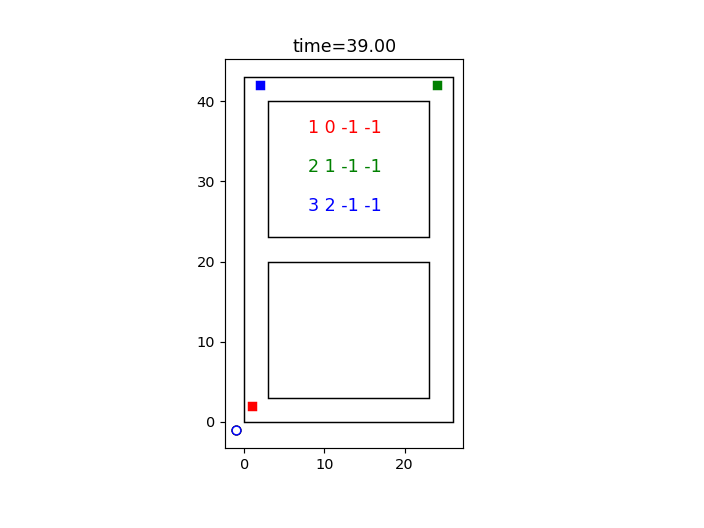

In [29]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import time

fig = plt.figure()
ax = plt.axes()

wall =  patches.Rectangle(xy=(0, 0), width=26, height=43, ec='#000000', fill=False)
k1 = patches.Rectangle(xy=(3, 3), width=20, height=17, ec='#000000', fill=False)
k2 = patches.Rectangle(xy=(3, 23), width=20, height=17, ec='#000000', fill=False)

ax.add_patch(wall)
ax.add_patch(k1)
ax.add_patch(k2)

path = 'vehicle_visual.txt'
vehicle_x = []
vehicle_y = []
rank = []
vehicle_x.append(1)
vehicle_y.append(2)
vehicle_x.append(24)
vehicle_y.append(42)
vehicle_x.append(2)
vehicle_y.append(42)
vehicle_x.append(1)
vehicle_y.append(2)
vehicle_x.append(24)
vehicle_y.append(42)
vehicle_x.append(2)
vehicle_y.append(42)
rank.append(0)
rank.append(1)
rank.append(2)
im = []
ims = []

time = 0
im0 = ax.text(0.5, 1.01, 'time={:.2f}'.format(time), ha='center', va='bottom', transform=ax.transAxes, fontsize='large')
im1 = plt.plot(vehicle_x[0], vehicle_y[0], "rs")
im2 = plt.plot(vehicle_x[1], vehicle_y[1], "gs")
im3 = plt.plot(vehicle_x[2], vehicle_y[2], "bs")
im4 = plt.plot(vehicle_x[0], vehicle_y[0], "ro")
im5 = plt.plot(vehicle_x[1], vehicle_y[1], "go")
im6 = plt.plot(vehicle_x[2], vehicle_y[2], "bo")
ims.append([im0]+im1+im2+im3+im4+im5+im6)

for line in open(path, "r"):
    data = line.split()
    time = int(data[0])
    im0 = ax.text(0.5, 1.01, 'time={:.2f}'.format(time), ha='center', va='bottom', transform=ax.transAxes, fontsize='large')

    for i in range(6):
        count = int(data[3*i+1])
        vehicle_x[count] = int(data[3*i+2])
        vehicle_y[count] = int(data[3*i+3])

        if(count == 0):
            im1 = plt.plot(vehicle_x[count], vehicle_y[count], "rs")
        elif(count == 1):
            im2 = plt.plot(vehicle_x[count], vehicle_y[count], "gs")
        elif(count == 2):
            im3 = plt.plot(vehicle_x[count], vehicle_y[count], "bs")
        elif(count == 3):
            im4 = plt.plot(vehicle_x[count], vehicle_y[count], "o", MarkerFaceColor="white", markeredgecolor="red")
        elif(count == 4):
            im5 = plt.plot(vehicle_x[count], vehicle_y[count], "o", MarkerFaceColor="white", markeredgecolor="green")
        elif(count == 5):
            im6 = plt.plot(vehicle_x[count], vehicle_y[count], "o", MarkerFaceColor="white", markeredgecolor="blue")

    rank[0] = int(data[19])
    im7 = ax.text(0.5, 0.8, '1 {} {} {}'.format(rank[0], vehicle_x[3], vehicle_y[3]), ha='center', va='bottom', transform=ax.transAxes, fontsize='large', color = "red")
    rank[1] = int(data[20])
    im8 = ax.text(0.5, 0.7, '2 {} {} {}'.format(rank[1], vehicle_x[4], vehicle_y[4]), ha='center', va='bottom', transform=ax.transAxes, fontsize='large', color = "green")
    rank[2] = int(data[21])
    im9 = ax.text(0.5, 0.6, '3 {} {} {}'.format(rank[2], vehicle_x[5], vehicle_y[5]), ha='center', va='bottom', transform=ax.transAxes, fontsize='large', color = "blue")

    ims.append([im0]+im1+im2+im3+im4+im5+im6+[im7]+[im8]+[im9])

plt.axis('scaled')
ax.set_aspect('equal')

ani = animation.ArtistAnimation(fig, ims, interval=100)
#ani.save('anim.gif', writer='imagemagick', fps=4)
s = ani.to_jshtml(fps=None, embed_frames=True, default_mode=None)
with open( 'anim.html', 'w') as f:
    f.write(s)

#ani.save('ani.mp4')

In [ ]:
for count in range(10):
    %run -i make_carrier.py
    print('vs_dijkstra.py')
    %run -i vs_dijkstra.py
    print("-------------------------------")
    print('vs_regular.py')
    %run -i vs_regular.py
    print("-------------------------------")

carrier_sum 100


<IPython.core.display.Javascript object>

vs_dijkstra.py
time 1693
衝突しました
搬送車番号 0 2
衝突座標 16 21
time 2807
衝突しました
搬送車番号 1 2
衝突座標 9 41
23
衝突回数 2
走行時間の総和 8850
最終走行完了時間 3050
-------------------------------
vs_regular.py
81
衝突回数 0
走行時間の総和 9319
最終走行完了時間 3224
-------------------------------
carrier_sum 100
vs_dijkstra.py
18
衝突回数 0
走行時間の総和 10259
最終走行完了時間 3703
-------------------------------
vs_regular.py
90
衝突回数 1
走行時間の総和 10191
最終走行完了時間 3687
-------------------------------
carrier_sum 100
vs_dijkstra.py
time 1237
衝突しました
搬送車番号 1 2
衝突座標 5 41
time 1238
衝突しました
搬送車番号 1 2
衝突座標 6 42
time 2958
衝突しました
搬送車番号 1 2
衝突座標 16 2
27
衝突回数 3
走行時間の総和 9956
最終走行完了時間 3427
-------------------------------
vs_regular.py
79
衝突回数 1
走行時間の総和 11312
最終走行完了時間 3881
-------------------------------
carrier_sum 100
vs_dijkstra.py
time 2416
衝突しました
搬送車番号 0 1
衝突座標 16 21
time 2417
衝突しました
搬送車番号 0 1
衝突座標 16 22
49
衝突回数 2
走行時間の総和 8420
最終走行完了時間 3282
-------------------------------
vs_regular.py
99
衝突回数 0
走行時間の総和 9598
最終走行完了時間 3537
-------------------------------
carrier_sum 100
vs_

In [3]:
%run -i vs_dijkstra.py

time 1608
衝突しました
搬送車番号 1 2
衝突座標 16 2
time 2014
衝突しました
搬送車番号 0 1
衝突座標 16 2
44
衝突回数 2
走行時間の総和 7955
最終走行完了時間 2830


<IPython.core.display.Javascript object>


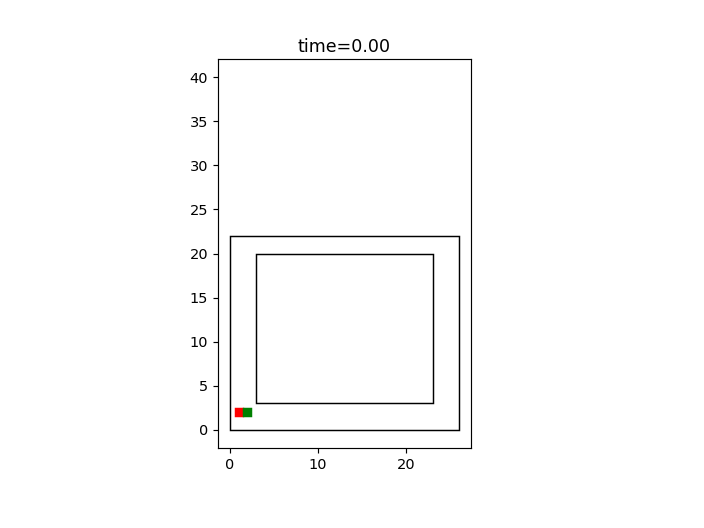

In [20]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import time

fig = plt.figure()
ax = plt.axes()

wall =  patches.Rectangle(xy=(0, 0), width=26, height=22, ec='#000000', fill=False)
k1 = patches.Rectangle(xy=(3, 3), width=20, height=17, ec='#000000', fill=False)


ax.add_patch(wall)
ax.add_patch(k1)

path = 'vehicle_visual.txt'
vehicle_x = []
vehicle_y = []
rank = []
vehicle_x.append(1)
vehicle_y.append(2)
vehicle_x.append(2)
vehicle_y.append(2)
rank.append(0)
rank.append(1)
rank.append(2)
im = []
ims = []

time = 0
im0 = ax.text(0.5, 1.01, 'time={:.2f}'.format(time), ha='center', va='bottom', transform=ax.transAxes, fontsize='large')
im1 = plt.plot(vehicle_x[0], vehicle_y[0], "rs", 40)
im2 = plt.plot(vehicle_x[1], vehicle_y[1], "gs", 40)
ims.append([im0]+im1+im2)

plt.axis('scaled')
ax.set_aspect('equal')
ani = animation.ArtistAnimation(fig, ims, interval=100)
s = ani.to_jshtml(fps=None, embed_frames=True, default_mode=None)
with open( 'anim.html', 'w') as f:
    f.write(s)